In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import copy
import random
%matplotlib notebook

### About the model

The model is SIZ, meaning it has three comparments: S (Susceptible), I (Infected) and Z (Skeptical)

S - The user has not tweeted any misinformation tweets

I - The user got infected and tweeted / retweeted a misinformation tweet

Z - The user saw misinformation tweets but decided to ignore them without any further actions

### Defined constants

In [24]:
NODE_COUNT = 200

INFECTED_RATIO = 20 / NODE_COUNT

DT = 0.1 # Time fraction
TIME = 10 # How many days to run the experiment for

p = 0.1 # Probability of Susceptible becoming Infected while seeing a misinformation tweet
l = 0.3 # Probability of Susceptible becoming Skeptical while seeing a misinformation tweet

In [11]:
def generate_random_network():
    G = nx.random_k_out_graph(NODE_COUNT, 5, 0.1, self_loops=False)

    # Populate infected among the nodes
    # 'status' holds the value of each node
    for i in range(NODE_COUNT):
        G.nodes[i].update({
            'status': 'infected' if random.uniform(0, 1) <= INFECTED_RATIO else 'susceptible'
        })
        
    return G

In [27]:
# On each run, generate a random graph
G = generate_random_network()

# G.adjacency graph??

# Neighbour count
S_list = []
I_list = []
Z_list = []

for t in range(round(TIME / DT)):
    # Make a copy of the graph for the time step
    newGraph = copy.deepcopy(G)
    
    # SIZ calculations
    for node in G:
        if (G.nodes[node]['status'] == 'susceptible'):
            # Number of infected neighbours
            infected_neighbours = 0

            # Loop through all neighbours (the arrow pointing to a node is the neighbour)
            for following_node_number in G[node]:
                is_neighbour_infected = G.nodes[following_node_number]['status'] == 'infected'
                
                infected_neighbours += 1 if is_neighbour_infected else 0
            
            infected_probability = 1 - (1 - p)**infected_neighbours
            skeptical_probability = 1 - (1 - l)**infected_neighbours
            
            # Do the calc. separately and flip a coin if node should become either

            # If the random value is lower than the infection probability, then the node becomes infected
            # Else, the node might become skeptical
            if (random.uniform(0, 1) < (DT * infected_probability)):
                newGraph.nodes[node]['status'] = 'infected'

            elif (random.uniform(0, 1) < (DT * skeptical_probability)):
                newGraph.nodes[node]['status'] = 'skeptical' 
            
    # Collect S, I and Z counts after each time step
    S_count = 0
    I_count = 0
    Z_count = 0
    
    for node in G:
        S_count += 1 if G.nodes[node]['status'] == 'susceptible' else 0
        I_count += 1 if G.nodes[node]['status'] == 'infected' else 0
        Z_count += 1 if G.nodes[node]['status'] == 'skeptical' else 0
        
    S_list.append(S_count)
    I_list.append(I_count)
    Z_list.append(Z_count)
    
    # Replace the old graph with the changed one
    G = newGraph
    

<IPython.core.display.Javascript object>


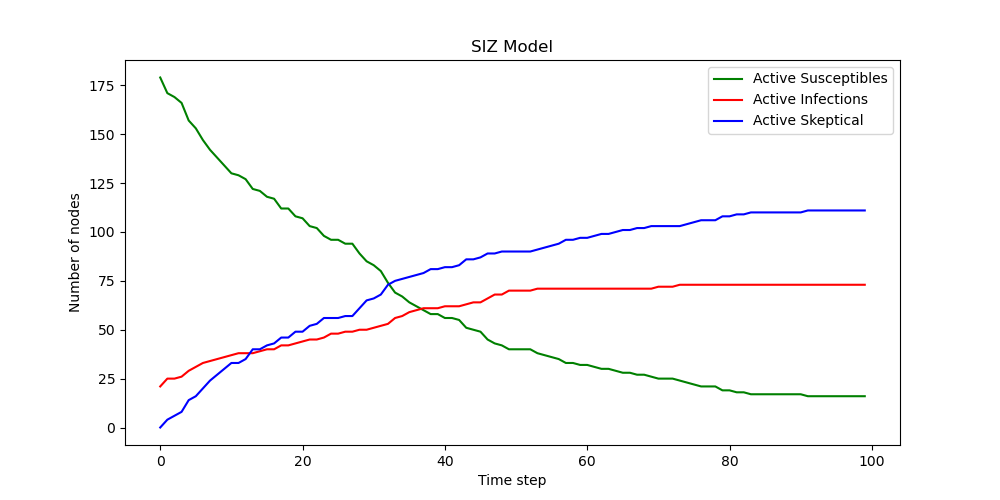

In [28]:
# Draw the SIZ Model
plt.figure(figsize=(10, 5))
plt.title('SIZ Model')

plt.plot(S_list, 'g-',  label = 'Active Susceptibles')
plt.plot(I_list, 'r-', label = 'Active Infections')
plt.plot(Z_list, 'b-', label = 'Active Skeptical')

plt.xlabel('Time step')
plt.ylabel('Number of nodes')

plt.legend()

plt.savefig('SIZ.png')

plt.show()

<IPython.core.display.Javascript object>


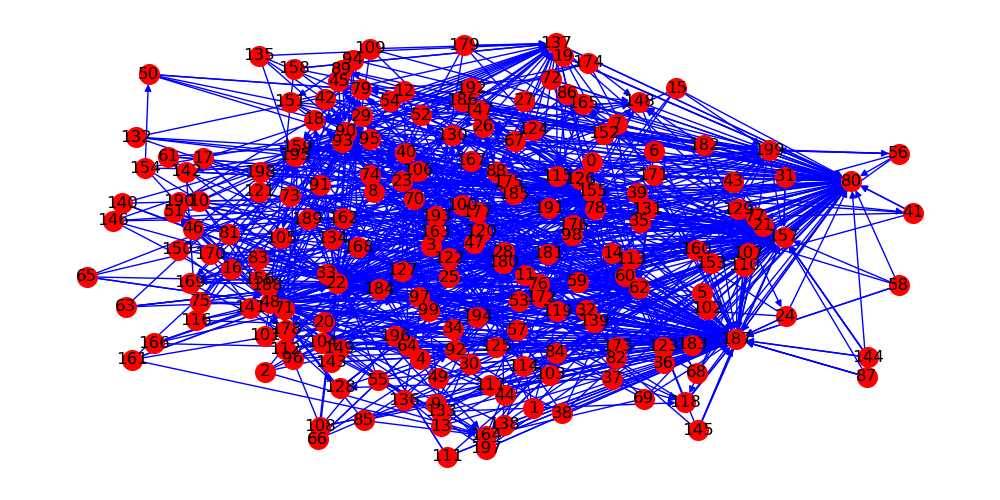

In [29]:
# Draw the network
plt.figure(figsize=(10, 5))

nx.draw(G, with_labels=True, node_size=200, node_color='#FF0000', edge_color='b')

plt.savefig('SIZ_network.png')
plt.show()

NameError: name 'np' is not defined